In [87]:
import pandas as pd
import numpy as np
import textstat
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [88]:
df = pd.read_csv('/Users/parthshukla/Downloads/BADM453/termprojectdataset.csv')

### 1. Exploratory objective

I want to see the statistical significance between the independent variables of different player stats or their draft pick. I plan to do statistical analysis by selecting a few predicting variables and compare that across several outcomes. For example, a common belief is that left-handed players are better 3-point shooters, so I will test that. Another example would be if a player's weight affects their rebound percentages.


Also, we should be able to see which of the variables has the greatest effect on the position of the player.

### 2. The predictive objective

I will be able to predict the player's position based on the statistics. In other words, given a set of player statistics, we will be able to predict the most optimal position for them to play. This will show us the best performing observations based on their statistics.

### 3. Sample data and variables
2.1 I have selected a dataset of NBA players since 1947. It is from a reputable data scientist on Kaggle who scraped the data from Basketball reference (a reliable basketball statistics website). It contains info about the year players were drafted, their career stats across the major categories, birthplace, weight, position, and dominant shooting hand.

2.2 The different observations are different statistics, draft place, position, and year for each player. We will be able to see across a large sample size.

##### Model
2.3 The outcome variable will be career_WS which is career win shares. This will show the most effective players. The model will be y (career_WS) = x1 (career_AST) + x2 (career_FGpct) + x3(career_FG3pct) + x4(career_FTpct) + x5(career_G) + x6(career_PER) + x7(career_PTS) + x8(career_TRB) + x9(draft_pick)

Any variable with "career" is their career average for that statistic. So, AST = assists, fcpct = field goal percentage, fg3pct = field goal percentage for 3 point shots, ftpct = free throw percentage, g = career games, PER = player efficiency rating, pts = points, trb = total rebound percentage, and then draft pick.


In [89]:
df

,birthDate,birthPlace,career_AST,career_FGpct,career_FG3pct,career_FTpct,career_G,career_PER,career_PTS,career_TRB,...,draft_team,draft_year,height,highSchool,name,position,shoots,weight,position_firstword,primary_position
0,10-Nov-30,"Muskogee, Oklahoma",0.6,37.1,NaN,65.7,351,10.2,5.9,6.3,...,Boston Celtics,NaN,8-Jun,"Columbia in Richland, Washington",Gene Conley,Power Forward,Right,225lb,Power,PF
1,17-Aug-39,NaN,1.0,21.6,NaN,56.3,12,5.6,2.1,1.6,...,Chicago Packers,1961,5-Jun,"Wyandotte in Kansas City, Kansas",Larry Comley,Guard,Right,210lb,Guard,PG
2,13-Mar-36,"Louisville, Kentucky",0.8,35.5,NaN,60.3,66,7.9,4.0,4.2,...,Cincinnati Royals,1958,9-Jun,"St. Christopher's School in Richmond, Virginia",Jack Parr,Center,Right,220lb,Center,C
3,30-Apr-46,NaN,0.3,26.1,NaN,69.2,25,5.6,1.3,0.4,...,Boston Celtics,1967,2-Jun,NaN,Rick Weitzman,Shooting Guard,Right,175lb,Shooting,SG
4,29-May-52,"Nashville, Tennessee",0.7,38.5,NaN,64,38,11.8,3.3,0.7,...,Detroit Pistons,1974,4-Jun,"Gallatin Union in Nashville, Tennessee",Bill Ligon,Shooting Guard,Right,180lb,Shooting,SG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,9-Apr-28,"Philadelphia, Pennsylvania",2.3,42.1,NaN,81,713,19.7,22.8,8.6,...,Philadelphia Warriors,NaN,4-Jun,"La Salle College in Philadelphia, Pennsylvania",Paul Arizin,Small Forward,Right,190lb,Small,SF
4681,23-Mar-55,"Petersburg, Virginia",1.3,49.5,9.6,76,1455,22,20.3,12.3,...,NaN,NaN,10-Jun,"Petersburg in Petersburg, Virginia",Moses Malone,Power Forward and Center,Right,215lb,Power,PF
4682,21-Aug-36,"Philadelphia, Pennsylvania",4.4,54,NaN,51.1,1045,26.1,30.1,22.9,...,Philadelphia Warriors,NaN,1-Jul,"Overbrook in Philadelphia, Pennsylvania",Wilt Chamberlain,Center,Right,275lb,Center,C
4683,7-Jan-31,NaN,0.3,31.8,NaN,50,12,-,1.6,2.1,...,NaN,NaN,6-Jun,"Grove in Paris, Tennessee",Dan King,Forward,Right,220lb,Forward,SF


In [90]:
df.shape

(4685, 25)

In [91]:
df.describe()

,career_AST,career_G,career_PTS
count,4685.000000,4685.000000,4685.000000
mean,1.420064,274.284525,6.425208
std,1.356122,311.116918,4.738534
min,0.000000,1.000000,0.000000
25%,0.500000,33.000000,2.900000
50%,1.000000,133.000000,5.200000
75%,1.900000,456.000000,8.700000
max,11.200000,1611.000000,30.100000


In [92]:
list(df.columns)

['birthDate',
 'birthPlace',
 'career_AST',
 'career_FGpct',
 'career_FG3pct',
 'career_FTpct',
 'career_G',
 'career_PER',
 'career_PTS',
 'career_TRB',
 'career_WS',
 'career_eFGpct',
 'college',
 'draft_pick',
 'draft_round',
 'draft_team',
 'draft_year',
 'height',
 'highSchool',
 'name',
 'position',
 'shoots',
 'weight',
 'position_firstword',
 'primary_position']

In [93]:
df.dtypes

birthDate              object
birthPlace             object
career_AST            float64
career_FGpct           object
career_FG3pct          object
career_FTpct           object
career_G                int64
career_PER             object
career_PTS            float64
career_TRB             object
career_WS              object
career_eFGpct          object
college                object
draft_pick             object
draft_round            object
draft_team             object
draft_year             object
height                 object
highSchool             object
name                   object
position               object
shoots                 object
weight                 object
position_firstword     object
primary_position       object
dtype: object

#### Data cleaning - need to convert "object" variables to int and float
- the process is removing any dashes in the statistics, converting the variables to floats, removing any trailing value in the draft pick so it is just the pick number, and cleaning the weight variable

In [94]:
df = df[df.career_AST != '-']

df = df[df.career_FGpct != '-']

df = df[df.career_FG3pct != '-']

df = df[df.career_FTpct != '-']

df = df[df.career_PER != '-']

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [95]:
df['career_PER'] = df['career_PER'].astype(float)
df['career_AST'] = df['career_AST'].astype(float)
df['career_FGpct'] = df['career_FGpct'].astype(float)
df['career_FG3pct'] = df['career_FG3pct'].astype(float)
df['career_FTpct'] = df['career_FTpct'].astype(float)
df['career_eFGpct'] = df['career_eFGpct'].astype(float)
df['career_TRB'] = df['career_TRB'].astype(float)

In [96]:
df['draft_pick'] = df['draft_pick'].str.replace('th overall', '')
df['draft_pick'] = df['draft_pick'].str.replace('nd overall', '')
df['draft_pick'] = df['draft_pick'].str.replace('rd overall', '')
df['draft_pick'] = df['draft_pick'].str.replace('st overall', '')

In [97]:
df['draft_round'] = df['draft_round'].str.replace('th round', '')
df['draft_round'] = df['draft_round'].str.replace('th roun', '')
df['draft_round'] = df['draft_round'].str.replace('nd round', '')
df['draft_round'] = df['draft_round'].str.replace('nd roun', '')
df['draft_round'] = df['draft_round'].str.replace('rd round', '')
df['draft_round'] = df['draft_round'].str.replace('rd roun', '')
df['draft_round'] = df['draft_round'].str.replace('st round', '')

In [98]:
df['draft_pick'] = df['draft_pick'].astype(float)
df['draft_round'] = df['draft_round'].astype(float)
df['career_WS'] = df['career_WS'].astype(float)

In [99]:
df['weight'] = df['weight'].str.replace('lb', '')
df['weight'] = df['weight'].astype(float)

In [100]:
#next convert 'shoots' variable to a binary for left or right hand
pd.crosstab(index=df["shoots"], columns="count")

col_0,count
shoots,
Left,253
Right,3503


In [101]:
import patsy

In [102]:
right_handed = patsy.dmatrix('C(shoots)', df, return_type='dataframe')  
right_handed

,Intercept,C(shoots)[T.Right]
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
4678,1.0,1.0
4679,1.0,1.0
4680,1.0,1.0
4681,1.0,1.0


In [103]:
df = pd.concat([df, right_handed], axis=1)
df

,birthDate,birthPlace,career_AST,career_FGpct,career_FG3pct,career_FTpct,career_G,career_PER,career_PTS,career_TRB,...,height,highSchool,name,position,shoots,weight,position_firstword,primary_position,Intercept,C(shoots)[T.Right]
0,10-Nov-30,"Muskogee, Oklahoma",0.6,37.1,NaN,65.7,351,10.2,5.9,6.3,...,8-Jun,"Columbia in Richland, Washington",Gene Conley,Power Forward,Right,225.0,Power,PF,1.0,1.0
1,17-Aug-39,NaN,1.0,21.6,NaN,56.3,12,5.6,2.1,1.6,...,5-Jun,"Wyandotte in Kansas City, Kansas",Larry Comley,Guard,Right,210.0,Guard,PG,1.0,1.0
2,13-Mar-36,"Louisville, Kentucky",0.8,35.5,NaN,60.3,66,7.9,4.0,4.2,...,9-Jun,"St. Christopher's School in Richmond, Virginia",Jack Parr,Center,Right,220.0,Center,C,1.0,1.0
3,30-Apr-46,NaN,0.3,26.1,NaN,69.2,25,5.6,1.3,0.4,...,2-Jun,NaN,Rick Weitzman,Shooting Guard,Right,175.0,Shooting,SG,1.0,1.0
4,29-May-52,"Nashville, Tennessee",0.7,38.5,NaN,64.0,38,11.8,3.3,0.7,...,4-Jun,"Gallatin Union in Nashville, Tennessee",Bill Ligon,Shooting Guard,Right,180.0,Shooting,SG,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,16-Sep-34,"Washington, District of Columbia",4.3,43.1,NaN,78.0,846,22.7,27.4,13.5,...,5-Jun,"Spingarn in Washington, District of Columbia",Elgin Baylor,Small Forward,Right,225.0,Small,SF,1.0,1.0
4679,18-Jun-24,"Joliet, Illinois",2.8,40.4,NaN,78.2,439,27.0,23.1,13.4,...,10-Jun,Archbishop Quigley Preparatory Seminary in Chi...,George Mikan,Center,Right,245.0,Center,C,1.0,1.0
4680,9-Apr-28,"Philadelphia, Pennsylvania",2.3,42.1,NaN,81.0,713,19.7,22.8,8.6,...,4-Jun,"La Salle College in Philadelphia, Pennsylvania",Paul Arizin,Small Forward,Right,190.0,Small,SF,1.0,1.0
4681,23-Mar-55,"Petersburg, Virginia",1.3,49.5,9.6,76.0,1455,22.0,20.3,12.3,...,10-Jun,"Petersburg in Petersburg, Virginia",Moses Malone,Power Forward and Center,Right,215.0,Power,PF,1.0,1.0


In [104]:
df['C(shoots)[T.Right]'] = df['C(shoots)[T.Right]'].astype(int)

In [105]:
df.dtypes

birthDate              object
birthPlace             object
career_AST            float64
career_FGpct          float64
career_FG3pct         float64
career_FTpct          float64
career_G                int64
career_PER            float64
career_PTS            float64
career_TRB            float64
career_WS             float64
career_eFGpct         float64
college                object
draft_pick            float64
draft_round           float64
draft_team             object
draft_year             object
height                 object
highSchool             object
name                   object
position               object
shoots                 object
weight                float64
position_firstword     object
primary_position       object
Intercept             float64
C(shoots)[T.Right]      int64
dtype: object

### Data visualizations of important variables

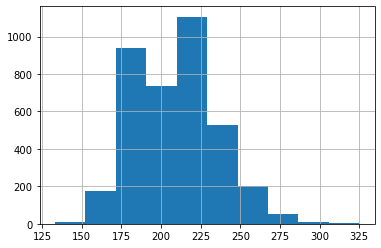

In [106]:
df['weight'].hist()

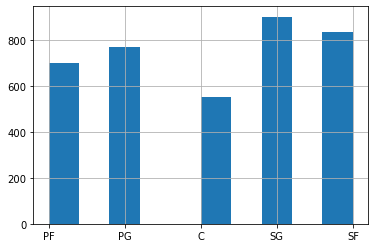

In [107]:
df['primary_position'].hist()

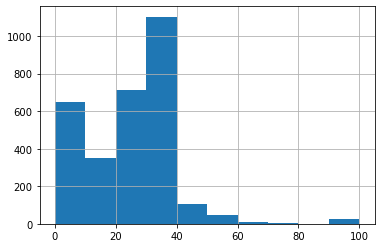

In [108]:
df['career_FG3pct'].hist()
#this shows us that most players average a career field goal percentage on three point shots from 0 to 40%. 
#There are some outliers.

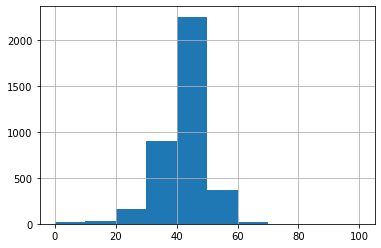

In [109]:
df['career_FGpct'].hist()


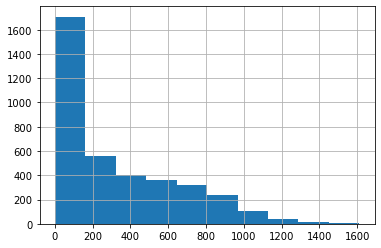

In [110]:
df['career_G'].hist()


This histogram shows us some outliers in the data for players who played fewer games. So, we will drop that

In [111]:
df = df[df['career_G'] > 200]  

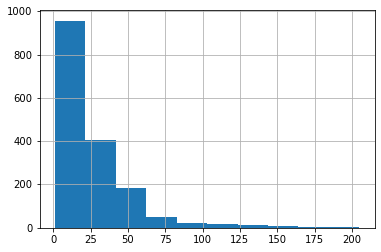

In [112]:
df['draft_pick'].hist()

This histogram shows us that most players are selected between 0 and 25. This makes sense because higher draft picks tend to be in the NBA. Players who are drafted later sometimes may not make the team.
Also it is important to note that until 1989, the NBA draft was more than two rounds. Now it is limited to two rounds of 30 picks, so 60 in total.

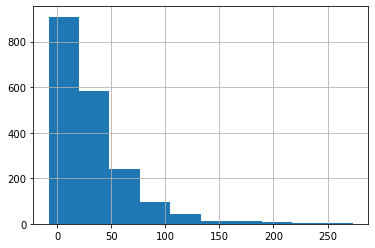

In [113]:
df['career_WS'].hist()

The distribution of the outcome variable shows us how most players are between 0 and 50 for win shares. A lot of them have 0. This means that these are the "worst" players because they did not affect games as much. To find the best kinds of players we can see the higher win shares, disregarding outliers. Also it is skewed so we must use log transformation

### The most appropriate methods for analysis:
- RMSE
- SHAP analysis
- OLS regression

In [114]:
df = df.dropna()

#### Models to see affect on win shares

In [115]:
y = df['career_WS']
X = df[['career_AST']]
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print(model1.summary()) #low r^2 value

                            OLS Regression Results                            
Dep. Variable:              career_WS   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     301.9
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           5.59e-61
Time:                        16:24:33   Log-Likelihood:                -6268.2
No. Observations:                1304   AIC:                         1.254e+04
Df Residuals:                    1302   BIC:                         1.255e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3686      1.391     10.330      0.0

In [116]:
y = df['career_WS']
X = df[['career_AST',
 'career_FGpct']]
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
print(model2.summary()) #r^2 increases

                            OLS Regression Results                            
Dep. Variable:              career_WS   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     341.2
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          7.26e-120
Time:                        16:24:33   Log-Likelihood:                -6129.2
No. Observations:                1304   AIC:                         1.226e+04
Df Residuals:                    1301   BIC:                         1.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -142.5872      9.014    -15.818   

In [117]:
y = df['career_WS']
X = df[['career_AST',
 'career_FGpct',
 'career_FG3pct']]
X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()
print(model3.summary()) #r^2 only increases a little

                            OLS Regression Results                            
Dep. Variable:              career_WS   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     239.5
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          1.09e-123
Time:                        16:24:33   Log-Likelihood:                -6117.4
No. Observations:                1304   AIC:                         1.224e+04
Df Residuals:                    1300   BIC:                         1.226e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -166.9425     10.229    -16.321

In [118]:
y = df['career_WS']
X = df[['career_AST',
 'career_FGpct',
 'career_FG3pct',
 'career_FTpct']]
X = sm.add_constant(X)
model4 = sm.OLS(y, X).fit()
print(model4.summary()) #r^2 increases based on 4 predictors

                            OLS Regression Results                            
Dep. Variable:              career_WS   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     189.7
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          4.29e-128
Time:                        16:24:33   Log-Likelihood:                -6104.3
No. Observations:                1304   AIC:                         1.222e+04
Df Residuals:                    1299   BIC:                         1.224e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -209.7402     13.129    -15.975

In [119]:
y = df['career_WS']
X = df[['career_AST',
 'career_FGpct',
 'career_FG3pct',
 'career_FTpct',
 'career_G']]
X = sm.add_constant(X)
model5 = sm.OLS(y, X).fit()
print(model5.summary()) 
#increase in r^2 a lot based on career games, also important to note because we dropped the 
#players who didn't play many games

                            OLS Regression Results                            
Dep. Variable:              career_WS   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     735.0
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:24:34   Log-Likelihood:                -5528.5
No. Observations:                1304   AIC:                         1.107e+04
Df Residuals:                    1298   BIC:                         1.110e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -146.4688      8.573    -17.084

In [120]:
y = df['career_WS']
X = df[['career_AST',
 'career_FGpct',
 'career_FG3pct',
 'career_FTpct',
 'career_G',
 'career_PER']]
X = sm.add_constant(X)
model6 = sm.OLS(y, X).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:              career_WS   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1107.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:24:34   Log-Likelihood:                -5222.9
No. Observations:                1304   AIC:                         1.046e+04
Df Residuals:                    1297   BIC:                         1.050e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -81.8789      7.170    -11.419

In [121]:
y = df['career_WS']
X = df[['career_AST',
 'career_FGpct',
 'career_FG3pct',
 'career_FTpct',
 'career_G',
 'career_PER',
 'career_PTS',
 'career_TRB', 'draft_pick']]
X = sm.add_constant(X)
model7 = sm.OLS(y, X).fit()
print(model7.summary()) #adding the final predictors brings the R^2 value to 84.4% which is pretty well fit.

                            OLS Regression Results                            
Dep. Variable:              career_WS   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     779.7
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:24:34   Log-Likelihood:                -5191.5
No. Observations:                1304   AIC:                         1.040e+04
Df Residuals:                    1294   BIC:                         1.045e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -90.8466      7.289    -12.463

This OLS regression shows us that for the categories that are not percentages, as they increase, so does career win shares. This is important to note because it shows how with higher statistics in these categories, a player will be able to affect the outcome of a game. Furthermore, for career field goal, free throw, and three point percent, these inidcate that as these are lower a win share will increase. This is interesting to see. This could be because most players will naturally have lower percentages here. Also the data shows that the higher the draft pick the greater the win share. This is interesting because better players will have lower draft picks. This could be because "role players" are drafted later which means they have a specific role to play and do it well. The r^2 being at 84.4% shows that this is pretty significant

In [122]:
### Linear Regression - seeing if left handed players are better/more efficient

In [123]:
y = df['C(shoots)[T.Right]']
X = df[['career_FG3pct', 'career_FGpct']]

X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:     C(shoots)[T.Right]   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.704
Date:                Tue, 08 Dec 2020   Prob (F-statistic):              0.182
Time:                        16:24:34   Log-Likelihood:                -122.22
No. Observations:                1304   AIC:                             250.4
Df Residuals:                    1301   BIC:                             266.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0810      0.102     10.550

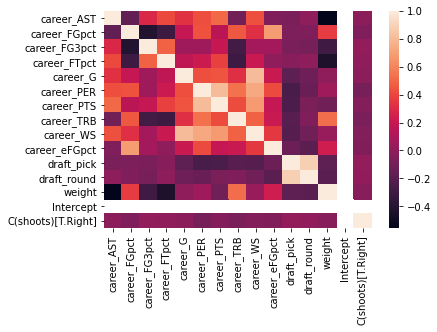

In [124]:
#checking for collinearity
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Nothing very collinear in this datset besides some of the field goal percentage data. So we will not be dropping it.

In [125]:
#normalized scaled predictions

y = df['career_WS']
X = df[['career_AST',
 'career_FGpct',
 'career_FG3pct',
 'career_FTpct',
 'career_G',
 'career_PER',
 'career_PTS',
 'career_TRB', 'draft_pick']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)


regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 12.617777099222183


In [126]:
from sklearn.metrics import classification_report, confusion_matrix

In [127]:
#next, see the affects of different statistics on categorical outcome variable

In [128]:
y = df['C(shoots)[T.Right]']
X = df[['career_AST',
 'career_FGpct',
 'career_FG3pct',
 'career_FTpct',
 'career_G',
 'career_PER',
 'career_PTS',
 'career_TRB']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 0)

logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_val)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[  0  32]
 [  0 360]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.92      1.00      0.96       360

    accuracy                           0.92       392
   macro avg       0.46      0.50      0.48       392
weighted avg       0.84      0.92      0.88       392



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


### Next, convert the categorical variable of primary position into a dummy variable.

In [129]:
pd.crosstab(index=df["primary_position"], columns="count")

col_0,count
primary_position,
C,241
PF,284
PG,251
SF,270
SG,258


In [130]:
primary_position = patsy.dmatrix('C(primary_position)', df, return_type='dataframe')  
primary_position

,Intercept,C(primary_position)[T.PF],C(primary_position)[T.PG],C(primary_position)[T.SF],C(primary_position)[T.SG]
20,1.0,1.0,0.0,0.0,0.0
21,1.0,0.0,0.0,0.0,1.0
22,1.0,0.0,1.0,0.0,0.0
23,1.0,1.0,0.0,0.0,0.0
24,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
3406,1.0,0.0,0.0,0.0,1.0
3407,1.0,0.0,0.0,1.0,0.0
3409,1.0,0.0,0.0,0.0,0.0
3410,1.0,0.0,0.0,1.0,0.0


In [131]:
df = pd.concat([df, primary_position], axis=1)
df

,birthDate,birthPlace,career_AST,career_FGpct,career_FG3pct,career_FTpct,career_G,career_PER,career_PTS,career_TRB,...,weight,position_firstword,primary_position,Intercept,C(shoots)[T.Right],Intercept,C(primary_position)[T.PF],C(primary_position)[T.PG],C(primary_position)[T.SF],C(primary_position)[T.SG]
20,26-Jun-44,"Los Angeles, California",1.2,42.3,19.0,77.4,269,15.9,8.4,5.2,...,205.0,Power,PF,1.0,1,1.0,1.0,0.0,0.0,0.0
21,22-Oct-46,"Memphis, Tennessee",2.1,39.3,28.9,86.6,245,11.9,8.8,1.5,...,170.0,Shooting,SG,1.0,1,1.0,0.0,0.0,0.0,1.0
22,15-Jan-47,"Peoria, Illinois",5.3,40.7,29.2,77.3,337,10.9,9.8,2.6,...,185.0,Point,PG,1.0,1,1.0,0.0,1.0,0.0,0.0
23,11-Oct-45,"Raleigh, North Carolina",1.0,48.2,18.9,60.7,453,15.0,7.8,4.8,...,235.0,Power,PF,1.0,1,1.0,1.0,0.0,0.0,0.0
24,23-Jul-48,"Riverside, California",2.1,46.2,19.4,73.5,842,12.6,6.1,4.5,...,220.0,Power,PF,1.0,1,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,16-Jun-52,"Mount Vernon, New York",2.8,45.2,27.3,81.3,337,13.8,9.1,3.3,...,190.0,Shooting,SG,1.0,0,1.0,0.0,0.0,0.0,1.0
3407,9-Feb-46,"Murray, Kentucky",1.3,44.4,32.3,78.1,259,15.7,13.6,5.7,...,195.0,Small,SF,1.0,1,1.0,0.0,0.0,1.0,0.0
3409,2-Sep-51,"Jackson, Mississippi",0.8,43.5,0.0,64.7,725,9.6,3.2,5.0,...,218.0,Center,C,1.0,1,1.0,0.0,0.0,0.0,0.0
3410,27-May-43,"Chicago, Illinois",1.3,51.4,0.0,69.1,329,16.3,10.8,6.2,...,205.0,Small,SF,1.0,0,1.0,0.0,0.0,1.0,0.0


In [132]:
df.columns

Index(['birthDate', 'birthPlace', 'career_AST', 'career_FGpct',
       'career_FG3pct', 'career_FTpct', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFGpct', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'position_firstword',
       'primary_position', 'Intercept', 'C(shoots)[T.Right]', 'Intercept',
       'C(primary_position)[T.PF]', 'C(primary_position)[T.PG]',
       'C(primary_position)[T.SF]', 'C(primary_position)[T.SG]'],
      dtype='object')

In [133]:
y = df['career_WS']
X = df[['weight', 'C(primary_position)[T.PF]', 'C(primary_position)[T.PG]', 'C(primary_position)[T.SF]', 'C(primary_position)[T.SG]']]

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              career_WS   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.643
Date:                Tue, 08 Dec 2020   Prob (F-statistic):              0.146
Time:                        16:24:34   Log-Likelihood:                -6400.1
No. Observations:                1304   AIC:                         1.281e+04
Df Residuals:                    1298   BIC:                         1.284e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

We can see as weight goes up, so does win share.  
also, in comparison players who are the position Center (C), each position has a lower win share. With shooting guards (SG) having the worst. Players who are point guards (PG) increase win shares. Position is not extremely significant. However, weight is very significant, so we can draw conclusions that heavier players are more impactful.

In [134]:
y = df['career_WS']
X = df[['career_FGpct',
       'career_FG3pct', 'career_FTpct', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'draft_pick']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [135]:
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              career_WS   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     856.3
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:24:34   Log-Likelihood:                -5205.2
No. Observations:                1304   AIC:                         1.043e+04
Df Residuals:                    1295   BIC:                         1.047e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -84.1353      7.249    -11.607

In [136]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [137]:
y_pred = regressor.predict(X_val)

In [138]:
pred = pd.DataFrame({'Actual': y_val.values.flatten(), 'Predicted': y_pred.flatten()}) 
pred

,Actual,Predicted
0,5.4,15.503008
1,15.6,27.757291
2,100.6,70.653660
3,22.4,30.892971
4,18.9,23.476856
...,...,...
387,55.4,58.284577
388,17.9,31.723588
389,19.9,29.631782
390,32.8,41.498388


In [139]:
logit = LinearRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 12.580267956722833


In [140]:
df_out = df[df['career_FGpct'] < 60]
df_out = df[df['career_FGpct'] > 0]
df_out = df[df['career_FGpct'] > 0]


y = df_out['career_WS']

X = df_out[['career_FGpct',
       'career_FG3pct', 'career_FTpct', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'draft_pick']]

In [141]:
X = sm.add_constant(X)
model5 = sm.OLS(y, X).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:              career_WS   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     856.3
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:24:35   Log-Likelihood:                -5205.2
No. Observations:                1304   AIC:                         1.043e+04
Df Residuals:                    1295   BIC:                         1.047e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -84.1353      7.249    -11.607

In [142]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [143]:
logit = LinearRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 12.580267956722835


In [144]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [145]:
y_pred = regressor.predict(X_val)

In [146]:
pred = pd.DataFrame({'Actual': y_val.values.flatten(), 'Predicted': y_pred.flatten()}) 
pred

,Actual,Predicted
0,5.4,15.503008
1,15.6,27.757291
2,100.6,70.653660
3,22.4,30.892971
4,18.9,23.476856
...,...,...
387,55.4,58.284577
388,17.9,31.723588
389,19.9,29.631782
390,32.8,41.498388


In [147]:
#predictors show

In [148]:
logit = LinearRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 12.580267956722835


In [149]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors = 3) 
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 17.360860778240554


In [150]:
import matplotlib.pyplot as plt

error = []

for i in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Mean Error')

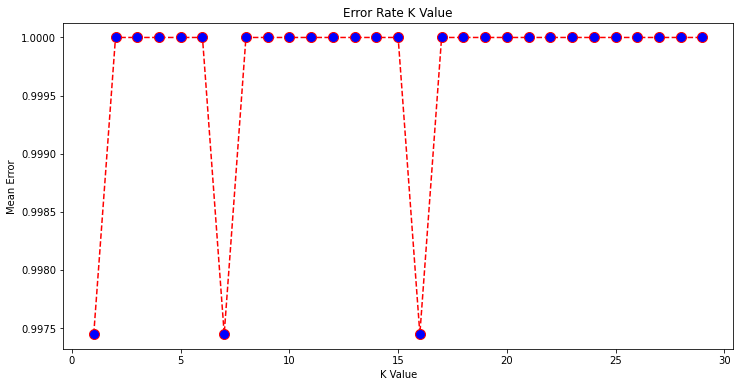

In [151]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Shap analysis and grid search

In [152]:
y = df['career_WS']
X = df[['weight', 'C(primary_position)[T.PF]', 'C(primary_position)[T.PG]', 'C(primary_position)[T.SF]', 'C(primary_position)[T.SG]']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state = 0)

In [153]:
param_grid = [{'kernel': ['poly', 'linear', 'rbf'], 'C': [1, 10, 50, 100]}]

In [154]:
svm = svm.SVR()

In [155]:
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_
shap_model = grid_search.best_estimator_

In [156]:
import shap
shap.initjs()

In [157]:
#taking a sample of X because it took a long time to load the original dataset. 
#I was still able to do it with all the variables though, but I will be using a 
#sample of 50 just to help speed up the process
X = shap.sample(X, 50)

In [158]:
explainer = shap.KernelExplainer(shap_model.predict, X)

In [159]:
shap_values = explainer.shap_values(X)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


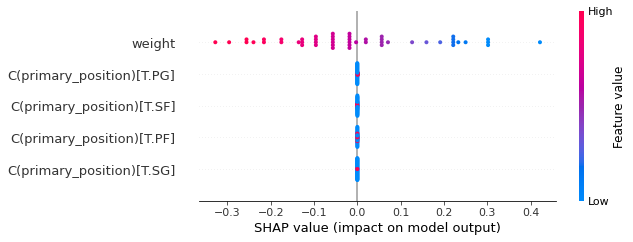

In [160]:
shap.summary_plot(shap_values, X)

we can see that in terms of feature importance, the variables are in decending order. Weight is the only numerical outcome so it has the highest feature value. This means that it was the most influential to the model. It means that for the horizontal SHAP value axis, that the effect caused a higher prediction.

Weight has a great influence on win shares. Not being a SG does as well. This is because we can see it has a lower feature value as SHAP.

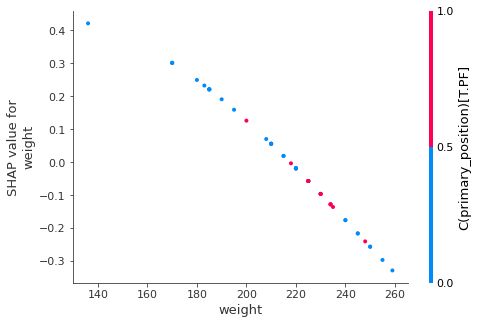

In [161]:
shap.dependence_plot("weight", shap_values, X)

We can see that for the numerical outcome for weight, that disregarding outliers, as the weight increased of a player, the SHAP value also increased. The relationship is that as weight increases, it will have a greater affect on the win shares - i.e. lighter players are not as impactful as heavier ones (with exceptions)

In [162]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

This model shows that the most optimal positions to play are SG and SF for affecting win shares and thus outcomes of basketball games. This means that they are better players overall. This actually makes a lot of sense because doing a quick sanity check - the best players unanimously all time are Michael Jordan and Lebron James who playeed those positions respectively. In addition, a weight of 180 decreases the model's accuracy. This means that weight higher than that would have a higher feature importance.

In [163]:
y = df['C(shoots)[T.Right]']
X = df[['C(primary_position)[T.PF]', 'C(primary_position)[T.PG]', 'C(primary_position)[T.SF]', 'C(primary_position)[T.SG]']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state = 0)

In [164]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_val)

In [165]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[  0  38]
 [  0 484]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.93      1.00      0.96       484

    accuracy                           0.93       522
   macro avg       0.46      0.50      0.48       522
weighted avg       0.86      0.93      0.89       522



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


# Best performing model

In [177]:
y = df['career_WS']
X = df[['career_AST',
 'career_FGpct',
 'career_FG3pct',
 'career_FTpct',
 'career_G',
 'career_PER',
 'career_PTS',
 'career_TRB', 'C(primary_position)[T.PF]', 'C(primary_position)[T.PG]', 'C(primary_position)[T.SF]', 'C(primary_position)[T.SG]']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 0)

model2 = RandomForestRegressor(max_depth = 6, n_estimators = 150, random_state = 0)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 9.154063940242802


In [178]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [179]:
name = df['name']

In [180]:
y_pred = regressor.predict(X_val)
pred = pd.DataFrame({'Actual': y_val.values.flatten(), 'Predicted': y_pred.flatten()}) 
pred

,Actual,Predicted
0,5.4,15.076953
1,15.6,26.084414
2,100.6,70.178301
3,22.4,29.340700
4,18.9,23.134548
...,...,...
256,48.5,46.059097
257,27.6,33.177125
258,25.2,21.833348
259,57.1,56.373722


This model is lower than the others in terms of its RMSE. This shows us that the players positions and statistics in this model were able to fit the findings in correlation with the career win shares. This is more effective than the other models because it has a relatively lower RMSE which means random forest regressor was more efficient in its random sampling of the distribution

# Conclusion

My statistics show that players who are left handed may be better three point shooters based on the regression analysis showing a negative correlation ebtween the percentage and the variable of their dominant hand. Also, it shows that players who are right handed may be more efficient at shots they take inside the 3-point line (their FG percentages).

The answer to the questions that I outlined in the beginning for ML is that the most efficient position to play for a player is most likely SG and SF if a player wants to affect the outcome of a game. This may change if they are simply looking for the highest statistics.

This analysis would actually be very useful for player development. If a player is trying to find the optimal and most efficient position to play then can look at this data in full (not just the sample) and see that players at SG and SF positions are the most efficient. Then they could find the optimal weight to see how impactful they can be based on their playstyle. There are a lot of limitations with this data analysis. First, there may be some error coming from the predetermined values. For example win shares and PER are pre-determined statistical observations for players. If I were to do this again I would try to derive my own formula for calculating how efficient and effective a player is.